1. Packages and libraries

In [550]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns   
import statsmodels.api as sm      
import scipy.stats as stats  


from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression     
from sklearn.metrics import mean_squared_error, r2_score  

2. Loads

In [551]:
URL_etfs = 'C:/Users/Matheus Rodrigues/OneDrive/Área de Trabalho/portfolio/data-science-portfolio/ml-real-problems/yahoo-investment-funds/data/ETFs.csv'
etfs = pd.read_csv(URL_etfs)

URL_etf_price = 'C:/Users/Matheus Rodrigues/OneDrive/Área de Trabalho/portfolio/data-science-portfolio/ml-real-problems/yahoo-investment-funds/data/ETF prices.csv'
etf_price = pd.read_csv(URL_etf_price, parse_dates=[1], infer_datetime_format=True) 

C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_10880\918999121.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  etf_price = pd.read_csv(URL_etf_price, parse_dates=[1], infer_datetime_format=True)


In [552]:
etfs.head()

,fund_symbol,quote_type,region,fund_short_name,fund_long_name,currency,fund_category,fund_family,exchange_code,exchange_name,...,fund_stdev_5years,fund_sharpe_ratio_5years,fund_treynor_ratio_5years,fund_alpha_10years,fund_beta_10years,fund_mean_annual_return_10years,fund_r_squared_10years,fund_stdev_10years,fund_sharpe_ratio_10years,fund_treynor_ratio_10years
0,AAAU,ETF,US,DWS RREEF Real Assets Fund - Cl,DWS RREEF Real Assets Fund - Class A,USD,NaN,DWS,PCX,NYSEArca,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AADR,ETF,US,AllianzGI Health Sciences Fund,Virtus AllianzGI Health Sciences Fund Class P,USD,Foreign Large Growth,Virtus,NGM,NasdaqGM,...,19.30,0.62,9.66,3.32,0.96,0.79,73.64,16.78,0.53,8.15
2,AAXJ,ETF,US,NaN,American Century One Choice Blend+ 2015 Portfo...,USD,Pacific/Asia ex-Japan Stk,American Century Investments,NGM,NasdaqGM,...,15.91,0.66,10.37,0.30,0.99,0.55,78.24,16.83,0.36,4.81
3,ABEQ,ETF,US,Thrivent Large Cap Growth Fund,Thrivent Large Cap Growth Fund Class A,USD,Large Value,Thrivent Funds,PCX,NYSEArca,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ACES,ETF,US,NaN,American Century One Choice Blend+ 2015 Portfo...,USD,Miscellaneous Sector,American Century Investments,PCX,NYSEArca,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [553]:
total_net_assets_mean = round(etfs['total_net_assets'].mean(), 1)
total_net_assets_std = etfs['total_net_assets'].std()
total_net_assets_size = len(etfs['total_net_assets'])

In [554]:
etfs.shape

(2310, 142)

In [555]:
etf_price.head()

,fund_symbol,price_date,open,high,low,close,adj_close,volume
0,AAA,2020-09-09,25.10,25.12,25.07,25.07,24.85,17300
1,AAA,2020-09-10,25.06,25.07,25.05,25.07,24.85,23500
2,AAA,2020-09-11,25.04,25.05,25.02,25.03,24.81,33400
3,AAA,2020-09-14,25.01,25.06,25.01,25.02,24.80,13100
4,AAA,2020-09-15,25.02,25.03,25.01,25.01,24.79,12100


In [556]:
etf_price.shape

(3866030, 8)

In [557]:
print(etf_price.dtypes)

fund_symbol            object
price_date     datetime64[ns]
open                  float64
high                  float64
low                   float64
close                 float64
adj_close             float64
volume                  int64
dtype: object


3. Knowing the data

3.1 Selecionando as colunas interesses em 'etfs'

In [558]:
etfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310 entries, 0 to 2309
Columns: 142 entries, fund_symbol to fund_treynor_ratio_10years
dtypes: float64(124), int64(1), object(17)
memory usage: 2.5+ MB


In [559]:
etfs = etfs[['fund_symbol', 'fund_category', 'fund_return_ytd',
             'total_net_assets', 'fund_yield', 'day50_moving_average', 
             'day200_moving_average', 'week52_high', 'week52_low', 
             'fund_price_earning_ratio']]

In [560]:
etfs.head()

,fund_symbol,fund_category,fund_return_ytd,total_net_assets,fund_yield,day50_moving_average,day200_moving_average,week52_high,week52_low,fund_price_earning_ratio
0,AAAU,NaN,-0.0465,3.844486e+08,NaN,17.807,17.818,19.44,16.69,NaN
1,AADR,Foreign Large Growth,0.0940,8.883616e+07,0.0031,64.555,65.297,69.36,57.54,13.34
2,AAXJ,Pacific/Asia ex-Japan Stk,-0.0173,5.574672e+09,0.0110,86.132,90.435,102.44,82.45,18.00
3,ABEQ,Large Value,0.0700,4.969417e+07,0.0049,27.639,27.389,28.80,24.46,16.71
4,ACES,Miscellaneous Sector,-0.0511,1.007483e+09,0.0053,73.532,72.601,101.72,61.05,31.27


3.2 Dictionary 

In [561]:
column_dict= {
    'fund_symbol': 'Símbolo do fundo - Identificador único do ETF.',
    'fund_category': 'Categoria do fundo - Classificação do fundo com base na sua estratégia ou tipo de investimento.',
    'fund_return_ytd': 'Retorno do fundo no ano até a data (YTD) - Percentual de retorno do fundo desde o início do ano até a data atual.',
    'total_net_assets': 'Ativos líquidos totais - Valor total dos ativos do fundo, líquidos de passivos.',
    'fund_yield': 'Rendimento do fundo - Percentual de retorno gerado pelo fundo em relação ao seu valor.',
    'day50_moving_average': 'Média móvel de 50 dias - Média dos preços de fechamento dos últimos 50 dias.',
    'day200_moving_average': 'Média móvel de 200 dias - Média dos preços de fechamento dos últimos 200 dias.',
    'week52_high': 'Máximo das 52 semanas - Maior preço de fechamento do fundo nos últimos 52 semanas.',
    'week52_low': 'Mínimo das 52 semanas - Menor preço de fechamento do fundo nos últimos 52 semanas.',
    'fund_price_earning_ratio': 'Relação preço/lucro do fundo - Razão entre o preço atual da ação e o lucro por ação (EPS).',
    'price_date': 'Data do preço - Data em que os preços e volumes são registrados.',
    'open': 'Preço de abertura - Preço do ETF no início do período de negociação.',
    'high': 'Preço mais alto - Maior preço alcançado pelo ETF durante o período de negociação.',
    'low': 'Preço mais baixo - Menor preço alcançado pelo ETF durante o período de negociação.',
    'close': 'Preço de fechamento - Preço final do ETF ao final do período de negociação.',
    'adj_close': 'Preço ajustado de fechamento - Preço de fechamento ajustado para dividendos e outras correções.',
    'volume': 'Volume - Quantidade de ações do ETF negociadas durante o período.'
}

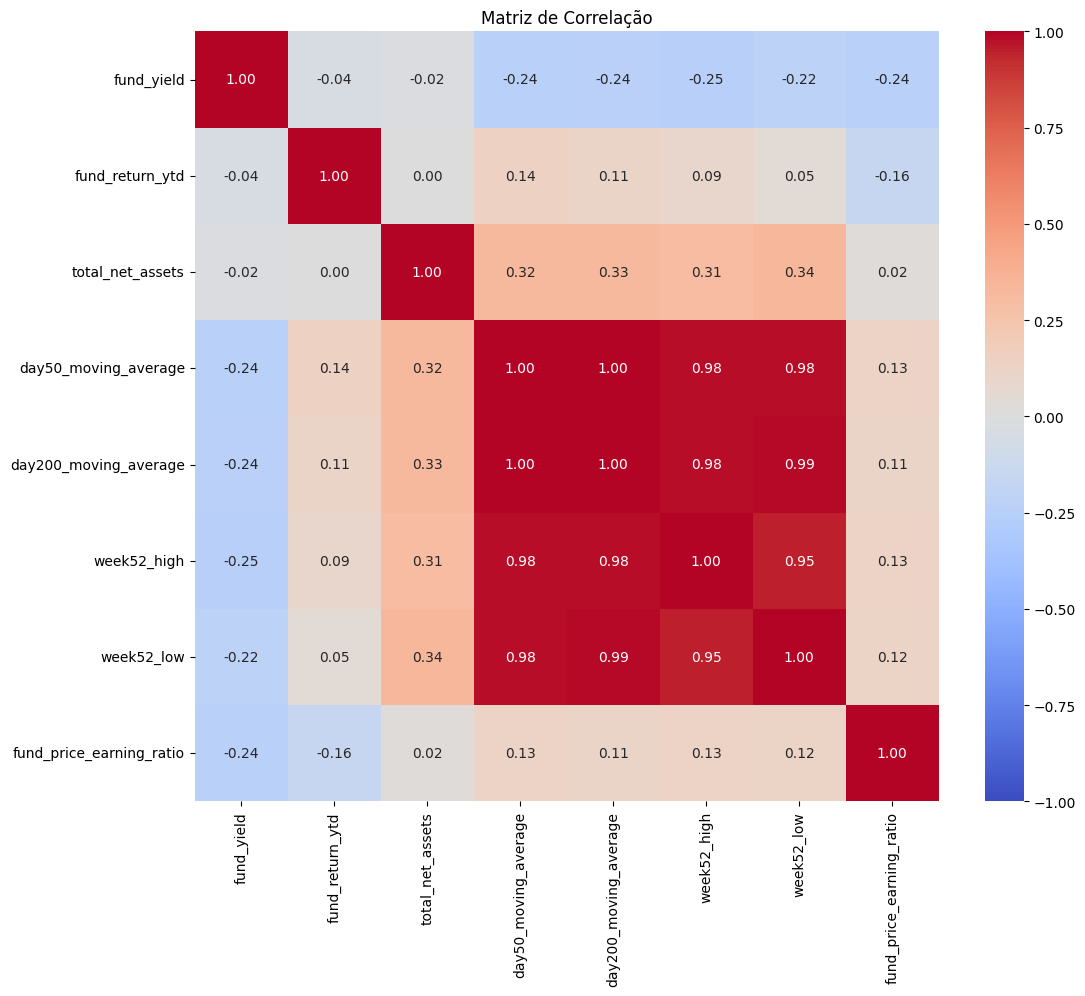

In [562]:
# Seleção das colunas numéricas
# Calcular a matriz de correlação e cria um mapa de calor da matriz de correlação

numeric_cols = ['fund_yield', 'fund_return_ytd', 'total_net_assets', 'day50_moving_average',
                 'day200_moving_average', 'week52_high', 'week52_low', 'fund_price_earning_ratio',]

correlation_matrix = etfs[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()


3.3 Null values

In [563]:
etfs.isna().value_counts()

fund_symbol  fund_category  fund_return_ytd  total_net_assets  fund_yield  day50_moving_average  day200_moving_average  week52_high  week52_low  fund_price_earning_ratio
False        False          False            False             False       False                 False                  False        False       False                       954
                                                                                                                                                 True                        329
             True           False            False             False       False                 False                  False        False       False                       182
             False          False            False             True        False                 False                  False        False       True                        179
             True           False            False             True        False                 False                  Fa

In [564]:
etf_price.isna().value_counts()

fund_symbol  price_date  open   high   low    close  adj_close  volume
False        False       False  False  False  False  False      False     3866030
Name: count, dtype: int64

3.3.1 Null values ​​in categorical columns

In [565]:
# Imputando os dados da coluna 'fund_category' pela moda.
fund_category_mode = etfs['fund_category'].mode()[0]
print(fund_category_mode)

Large Blend


In [566]:
# Aplicando uma função lambda na coluna 'fund_category' que verifica se o valor da coluna é NaN e substitue pela medo
etfs['fund_category'] = etfs['fund_category'].apply(lambda x: fund_category_mode if pd.isna(x) else x)

In [567]:
category_freq = etfs['fund_category'].value_counts()
print(category_freq)

fund_category
Large Blend                   790
Large Value                    78
Trading--Leveraged Equity      78
Trading--Inverse Equity        65
Diversified Emerging Mkts      64
                             ... 
Muni California Long            2
Allocation--85%+ Equity         1
Diversified Pacific/Asia        1
Muni Minnesota                  1
Muni New York Intermediate      1
Name: count, Length: 83, dtype: int64


In [568]:
etfs['fund_category_freq'] = etfs['fund_category'].map(category_freq)

In [569]:
print(etfs[['fund_category', 'fund_category_freq']].head())

               fund_category  fund_category_freq
0                Large Blend                 790
1       Foreign Large Growth                  14
2  Pacific/Asia ex-Japan Stk                  10
3                Large Value                  78
4       Miscellaneous Sector                  22


In [570]:
unique_category = etfs['fund_category_freq'].unique()
print(unique_category)

[790  14  10  78  22  18  58  64  17  50  39  35  24  31  11   9   7  62
  16  46   8  28  57  23  12  20  65   5  30   2  13  26  15   3   6  25
   1   4]


In [571]:
fund_category_freq_mean = round(etfs['fund_category_freq'].mean(), 1)
print(fund_category_freq_mean)

294.0


In [572]:
fund_category_freq_std = etfs['fund_category_freq'].std()
print(fund_category_freq_std)

358.18944468785895


In [573]:
etfs.head()

,fund_symbol,fund_category,fund_return_ytd,total_net_assets,fund_yield,day50_moving_average,day200_moving_average,week52_high,week52_low,fund_price_earning_ratio,fund_category_freq
0,AAAU,Large Blend,-0.0465,3.844486e+08,NaN,17.807,17.818,19.44,16.69,NaN,790
1,AADR,Foreign Large Growth,0.0940,8.883616e+07,0.0031,64.555,65.297,69.36,57.54,13.34,14
2,AAXJ,Pacific/Asia ex-Japan Stk,-0.0173,5.574672e+09,0.0110,86.132,90.435,102.44,82.45,18.00,10
3,ABEQ,Large Value,0.0700,4.969417e+07,0.0049,27.639,27.389,28.80,24.46,16.71,78
4,ACES,Miscellaneous Sector,-0.0511,1.007483e+09,0.0053,73.532,72.601,101.72,61.05,31.27,22


In [574]:
etfs['fund_category_freq_std'] = etfs['fund_category_freq'].apply(
    lambda x: (x - fund_category_freq_mean) / fund_category_freq_std)

In [575]:
etfs.head()

,fund_symbol,fund_category,fund_return_ytd,total_net_assets,fund_yield,day50_moving_average,day200_moving_average,week52_high,week52_low,fund_price_earning_ratio,fund_category_freq,fund_category_freq_std
0,AAAU,Large Blend,-0.0465,3.844486e+08,NaN,17.807,17.818,19.44,16.69,NaN,790,1.384742
1,AADR,Foreign Large Growth,0.0940,8.883616e+07,0.0031,64.555,65.297,69.36,57.54,13.34,14,-0.781709
2,AAXJ,Pacific/Asia ex-Japan Stk,-0.0173,5.574672e+09,0.0110,86.132,90.435,102.44,82.45,18.00,10,-0.792877
3,ABEQ,Large Value,0.0700,4.969417e+07,0.0049,27.639,27.389,28.80,24.46,16.71,78,-0.603033
4,ACES,Miscellaneous Sector,-0.0511,1.007483e+09,0.0053,73.532,72.601,101.72,61.05,31.27,22,-0.759375


3.3.2 Null values ​​in numeric  columns

In [576]:
etfs.isna().value_counts()

fund_symbol  fund_category  fund_return_ytd  total_net_assets  fund_yield  day50_moving_average  day200_moving_average  week52_high  week52_low  fund_price_earning_ratio  fund_category_freq  fund_category_freq_std
False        False          False            False             False       False                 False                  False        False       False                     False               False                     1136
                                                                                                                                                 True                      False               False                      450
                                                               True        False                 False                  False        False       True                      False               False                      266
                                                                                                                        

In [577]:
# Calculando a média de cada coluna com atributos numéricos em 'etfs'

fund_return_ytd_mean = round(etfs['fund_return_ytd'].mean(), 1)
print(fund_return_ytd_mean)
fund_yield_mean = round(etfs['fund_yield'].mean(), 1)
print(fund_yield_mean)
day50_moving_average_mean = round(etfs['day50_moving_average'].mean(), 1)
print(day50_moving_average_mean)
day200_moving_average_mean = round(etfs['day200_moving_average'].mean(), 1)
print(day200_moving_average_mean)
week52_high_mean = round(etfs['week52_high'].mean(), 1)
print(week52_high_mean)
week52_low_mean = round(etfs['week52_low'].mean(), 1)
print(week52_low_mean)
fund_price_earning_ratio_mean = round(etfs['fund_price_earning_ratio'].mean(), 1)
print(fund_price_earning_ratio_mean)

0.1
0.0
48.6
47.7
53.6
40.8
22.8


In [578]:
# Preenchendo os valores NaN com o método fillna em 'etfs'

etfs['fund_return_ytd'].fillna(fund_return_ytd_mean, inplace=True)
etfs['fund_yield'].fillna(fund_yield_mean, inplace=True)
etfs['day50_moving_average'].fillna(day50_moving_average_mean, inplace=True)
etfs['day200_moving_average'].fillna(day200_moving_average_mean, inplace=True)
etfs['week52_high'].fillna(week52_high_mean, inplace=True)
etfs['week52_low'].fillna(week52_low_mean, inplace=True)
etfs['fund_price_earning_ratio'].fillna(fund_price_earning_ratio_mean, inplace=True)

In [579]:
etfs.head()

,fund_symbol,fund_category,fund_return_ytd,total_net_assets,fund_yield,day50_moving_average,day200_moving_average,week52_high,week52_low,fund_price_earning_ratio,fund_category_freq,fund_category_freq_std
0,AAAU,Large Blend,-0.0465,3.844486e+08,0.0000,17.807,17.818,19.44,16.69,22.80,790,1.384742
1,AADR,Foreign Large Growth,0.0940,8.883616e+07,0.0031,64.555,65.297,69.36,57.54,13.34,14,-0.781709
2,AAXJ,Pacific/Asia ex-Japan Stk,-0.0173,5.574672e+09,0.0110,86.132,90.435,102.44,82.45,18.00,10,-0.792877
3,ABEQ,Large Value,0.0700,4.969417e+07,0.0049,27.639,27.389,28.80,24.46,16.71,78,-0.603033
4,ACES,Miscellaneous Sector,-0.0511,1.007483e+09,0.0053,73.532,72.601,101.72,61.05,31.27,22,-0.759375


4. Standardization of numerical variables

In [580]:
etf_price.head()

,fund_symbol,price_date,open,high,low,close,adj_close,volume
0,AAA,2020-09-09,25.10,25.12,25.07,25.07,24.85,17300
1,AAA,2020-09-10,25.06,25.07,25.05,25.07,24.85,23500
2,AAA,2020-09-11,25.04,25.05,25.02,25.03,24.81,33400
3,AAA,2020-09-14,25.01,25.06,25.01,25.02,24.80,13100
4,AAA,2020-09-15,25.02,25.03,25.01,25.01,24.79,12100


In [581]:
# Calculando a média de cada coluna com atributos numéricos em 'etf_price'

open_mean = round(etf_price['open'].mean(), 1)
print(open_mean)
high_mean = round(etf_price['high'].mean(), 1)
print(high_mean)
low_mean = round(etf_price['low'].mean(), 1)
print(low_mean)
close_mean = round(etf_price['close'].mean(), 1)
print(close_mean)
adj_close_mean = round(etf_price['adj_close'].mean(), 1)
print(adj_close_mean)
volume_mean = round(etf_price['volume'].mean(), 1)
print(volume_mean)

120253.7
126281.1
114973.4
119672.6
119657.9
1026744.8


In [582]:
# Calculando o desvio padrão de cada coluna com atributos numéricos em 'etfs'

fund_return_ytd_std = etfs['fund_return_ytd'].std()
print(fund_return_ytd_std)
fund_yield_std = etfs['fund_yield'].std()
print(fund_yield_std)
day50_moving_average_std = etfs['day50_moving_average'].std()
print(day50_moving_average_std)
day200_moving_average_std = etfs['day200_moving_average'].std()
print(day200_moving_average_std)
week52_high_std = etfs['week52_high'].std()
print(week52_high_std)
week52_low_std = etfs['week52_low'].std()
print(week52_low_std)
fund_price_earning_ratio_std = etfs['fund_price_earning_ratio'].std()
print(fund_price_earning_ratio_std)

0.17014396898030446
0.01857490519178202
46.333452790748254
43.417752284623184
50.623202077179755
35.57298376447101
6.422257497225157


In [583]:
# Calculando o desvio padrão de cada coluna com atributos numéricos em 'etf_price'

open_std = etf_price['open'].std()
print(open_std)
high_std = etf_price['high'].std()
print(high_std)
low_std = etf_price['low'].std()
print(low_std)
close_std = etf_price['close'].std()
print(close_std)
adj_close_std = etf_price['adj_close'].std()
print(adj_close_std)
volume_std = etf_price['volume'].std()
print(volume_std)

11499170.42343654
12082695.179983163
10972041.547757039
11436553.681459645
11436553.20879926
12757329.135414358


In [584]:
# Aplicando a função de padronização em 'etf_price'

etf_price['open_std'] = etf_price['open'].apply(
    lambda x: (x - open_mean) / open_std)
etf_price['high_std'] = etf_price['high'].apply(
    lambda x: (x - high_mean) / high_std)
etf_price['low_std'] = etf_price['low'].apply(
    lambda x: (x - low_mean) / low_std)
etf_price['close_std'] = etf_price['close'].apply(
    lambda x: (x - close_mean) / close_std)
etf_price['adj_close_std'] = etf_price['adj_close'].apply
(lambda x: (x - adj_close_mean) / adj_close_std)
etf_price['volume_std'] = etf_price['volume'].apply(
    lambda x: (x - volume_mean) / volume_std)

In [585]:
# Aplicando a função de padronização em 'etfs'

etfs['fund_return_ytd_std'] = etfs['fund_return_ytd'].apply(
    lambda x: (x - fund_return_ytd_mean) / fund_return_ytd_std)
etfs['fund_yield_std'] = etfs['fund_yield'].apply(
    lambda x: (x - fund_yield_mean) / fund_yield_std)
etfs['day50_moving_average_std'] = etfs['day50_moving_average'].apply(
    lambda x: (x - day50_moving_average_mean) / day50_moving_average_std)
etfs['day200_moving_average_std'] = etfs['day200_moving_average'].apply
(lambda x: (x - day200_moving_average_mean) / day200_moving_average_std)
etfs['week52_high_std'] = etfs['week52_high'].apply(
    lambda x: (x - week52_high_mean) / week52_high_std)
etfs['week52_low_std'] = etfs['week52_low'].apply(
    lambda x: (x - week52_low_mean) / week52_low_std)
etfs['fund_price_earning_ratio_std'] = etfs['fund_price_earning_ratio'].apply(
    lambda x: (x - fund_price_earning_ratio_mean) / fund_price_earning_ratio_std)


In [586]:
etf_price.head()

,fund_symbol,price_date,open,high,low,close,adj_close,volume,open_std,high_std,low_std,close_std,adj_close_std,volume_std
0,AAA,2020-09-09,25.10,25.12,25.07,25.07,24.85,17300,-0.010455,-0.010449,-0.010476,-0.010462,<bound method Series.apply of 0 24.85...,-0.079127
1,AAA,2020-09-10,25.06,25.07,25.05,25.07,24.85,23500,-0.010455,-0.010449,-0.010476,-0.010462,<bound method Series.apply of 0 24.85...,-0.078641
2,AAA,2020-09-11,25.04,25.05,25.02,25.03,24.81,33400,-0.010455,-0.010449,-0.010476,-0.010462,<bound method Series.apply of 0 24.85...,-0.077865
3,AAA,2020-09-14,25.01,25.06,25.01,25.02,24.80,13100,-0.010455,-0.010449,-0.010476,-0.010462,<bound method Series.apply of 0 24.85...,-0.079456
4,AAA,2020-09-15,25.02,25.03,25.01,25.01,24.79,12100,-0.010455,-0.010449,-0.010476,-0.010462,<bound method Series.apply of 0 24.85...,-0.079534


In [587]:
etfs.head()

,fund_symbol,fund_category,fund_return_ytd,total_net_assets,fund_yield,day50_moving_average,day200_moving_average,week52_high,week52_low,fund_price_earning_ratio,fund_category_freq,fund_category_freq_std,fund_return_ytd_std,fund_yield_std,day50_moving_average_std,day200_moving_average_std,week52_high_std,week52_low_std,fund_price_earning_ratio_std
0,AAAU,Large Blend,-0.0465,3.844486e+08,0.0000,17.807,17.818,19.44,16.69,22.80,790,1.384742,-0.861036,0.000000,-0.664595,<bound method Series.apply of 0 17.818\n...,-0.674789,-0.677762,0.000000
1,AADR,Foreign Large Growth,0.0940,8.883616e+07,0.0031,64.555,65.297,69.36,57.54,13.34,14,-0.781709,-0.035264,0.166892,0.344352,<bound method Series.apply of 0 17.818\n...,0.311320,0.470582,-1.473002
2,AAXJ,Pacific/Asia ex-Japan Stk,-0.0173,5.574672e+09,0.0110,86.132,90.435,102.44,82.45,18.00,10,-0.792877,-0.689416,0.592197,0.810041,<bound method Series.apply of 0 17.818\n...,0.964775,1.170832,-0.747401
3,ABEQ,Large Value,0.0700,4.969417e+07,0.0049,27.639,27.389,28.80,24.46,16.71,78,-0.603033,-0.176321,0.263797,-0.452395,<bound method Series.apply of 0 17.818\n...,-0.489894,-0.459337,-0.948265
4,ACES,Miscellaneous Sector,-0.0511,1.007483e+09,0.0053,73.532,72.601,101.72,61.05,31.27,22,-0.759375,-0.888071,0.285331,0.538099,<bound method Series.apply of 0 17.818\n...,0.950552,0.569252,1.318851


5. Dataframe cleaning

In [588]:
etf_price.head()

,fund_symbol,price_date,open,high,low,close,adj_close,volume,open_std,high_std,low_std,close_std,adj_close_std,volume_std
0,AAA,2020-09-09,25.10,25.12,25.07,25.07,24.85,17300,-0.010455,-0.010449,-0.010476,-0.010462,<bound method Series.apply of 0 24.85...,-0.079127
1,AAA,2020-09-10,25.06,25.07,25.05,25.07,24.85,23500,-0.010455,-0.010449,-0.010476,-0.010462,<bound method Series.apply of 0 24.85...,-0.078641
2,AAA,2020-09-11,25.04,25.05,25.02,25.03,24.81,33400,-0.010455,-0.010449,-0.010476,-0.010462,<bound method Series.apply of 0 24.85...,-0.077865
3,AAA,2020-09-14,25.01,25.06,25.01,25.02,24.80,13100,-0.010455,-0.010449,-0.010476,-0.010462,<bound method Series.apply of 0 24.85...,-0.079456
4,AAA,2020-09-15,25.02,25.03,25.01,25.01,24.79,12100,-0.010455,-0.010449,-0.010476,-0.010462,<bound method Series.apply of 0 24.85...,-0.079534


In [589]:
etf_price = etf_price.drop(['open', 'price_date', 'high', 'high', 'close', 'close', 'adj_close', 'adj_close_std'], axis=1)

colunas_ordenadas = ['fund_symbol', 'open_std', 'high_std', 'low_std', 'volume_std']

etf_price = etf_price[colunas_ordenadas]

In [590]:
etfs = etfs.drop(['fund_category', 'fund_return_ytd', 'fund_category_freq', 'fund_yield',  
             'day50_moving_average', 'day200_moving_average', 'day200_moving_average_std', 'week52_high',
             'week52_low', 'fund_price_earning_ratio'], axis=1)

colunas_ordenadas = ['fund_symbol', 'total_net_assets','fund_yield_std', 'fund_category_freq_std', 
                     'fund_return_ytd_std', 'day50_moving_average_std','week52_high_std',
                       'week52_low_std', 'fund_price_earning_ratio_std']
etfs = etfs[colunas_ordenadas]

In [591]:
etfs.head()

,fund_symbol,total_net_assets,fund_yield_std,fund_category_freq_std,fund_return_ytd_std,day50_moving_average_std,week52_high_std,week52_low_std,fund_price_earning_ratio_std
0,AAAU,3.844486e+08,0.000000,1.384742,-0.861036,-0.664595,-0.674789,-0.677762,0.000000
1,AADR,8.883616e+07,0.166892,-0.781709,-0.035264,0.344352,0.311320,0.470582,-1.473002
2,AAXJ,5.574672e+09,0.592197,-0.792877,-0.689416,0.810041,0.964775,1.170832,-0.747401
3,ABEQ,4.969417e+07,0.263797,-0.603033,-0.176321,-0.452395,-0.489894,-0.459337,-0.948265
4,ACES,1.007483e+09,0.285331,-0.759375,-0.888071,0.538099,0.950552,0.569252,1.318851


6. Sampling and Merge

In [592]:
etfs.shape

(2310, 9)

In [593]:
etfs.drop_duplicates()

,fund_symbol,total_net_assets,fund_yield_std,fund_category_freq_std,fund_return_ytd_std,day50_moving_average_std,week52_high_std,week52_low_std,fund_price_earning_ratio_std
0,AAAU,3.844486e+08,0.000000,1.384742,-0.861036,-0.664595,-0.674789,-0.677762,0.000000
1,AADR,8.883616e+07,0.166892,-0.781709,-0.035264,0.344352,0.311320,0.470582,-1.473002
2,AAXJ,5.574672e+09,0.592197,-0.792877,-0.689416,0.810041,0.964775,1.170832,-0.747401
3,ABEQ,4.969417e+07,0.263797,-0.603033,-0.176321,-0.452395,-0.489894,-0.459337,-0.948265
4,ACES,1.007483e+09,0.285331,-0.759375,-0.888071,0.538099,0.950552,0.569252,1.318851
...,...,...,...,...,...,...,...,...,...
2305,EPP,2.446532e+09,1.232846,-0.792877,-0.122837,0.031640,0.007309,0.162202,0.004671
2306,ERUS,5.766318e+08,2.277266,-0.681204,0.603606,0.011050,-0.015803,-0.134934,-1.857602
2307,EWA,1.527077e+09,1.205928,-0.681204,-0.052896,-0.494308,-0.516957,-0.488011,0.123010
2308,EWC,4.342182e+09,0.893679,-0.681204,0.681188,-0.216863,-0.267071,-0.294324,-0.789442
